In [1]:
#Allows relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
#imports 
from src.preprocessing import *
from src.models import *
from src.torch_util import *
from src.train_eval_helpers import *
%load_ext autoreload
%autoreload 2
#checking gpu status

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi']= 300
import seaborn as sns
sns.set_style('darkgrid')

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using : {}".format(device))
else:
    device = torch.device('cpu')
    print("Using : {}".format(device))
    
RANGE = range(12,17)
#Reading data
TRAINDIR = '../TrainingData/'
files = os.listdir(TRAINDIR)
files = [f for f in files if '.txt' in f]
TRAINDIR+files[0]
train_normal = read_seq(TRAINDIR+files[0])
train_tumor = read_seq(TRAINDIR+files[2])

train_feats, train_labels = generate_features_labels(train_tumor, train_normal)
#files.remve('readme.md')
files

ModuleNotFoundError: No module named 'src.dataloader'

['deepcat_cnn_12_best_val.pth.tar', 'deepcat_cnn_13_best_val.pth.tar', 'deepcat_cnn_14_best_val.pth.tar', 'deepcat_cnn_15_best_val.pth.tar', 'deepcat_cnn_16_best_val.pth.tar']
Models loaded


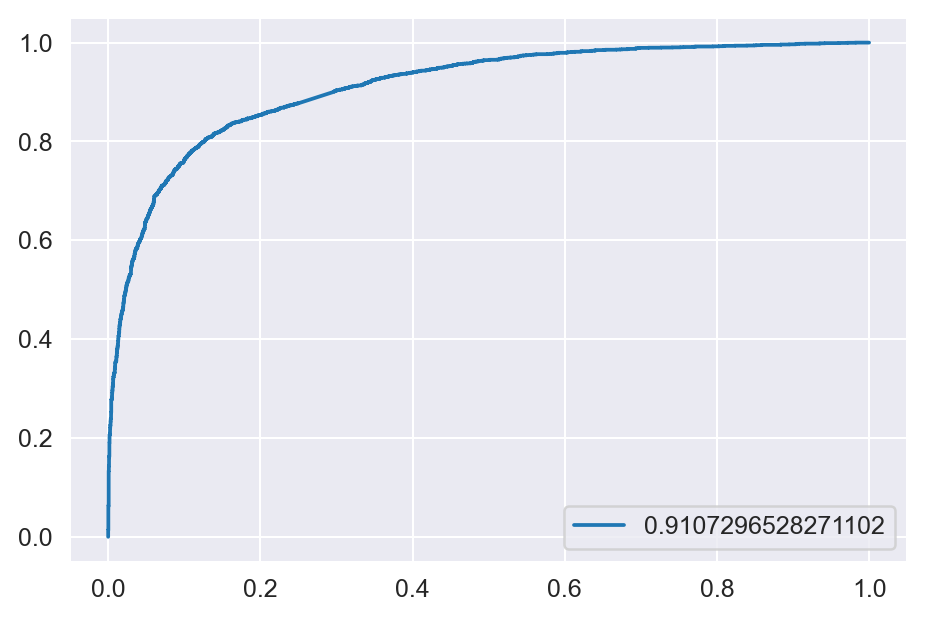

In [4]:
PATH = '../src/Output/test/'
files = os.listdir(PATH)

z = [f for f in files if '.pth.tar' in f]
print(z)
test_dict2 = load_models([12,13,16], PATH)
a,b,c,d,e = eval_model(test_dict2[12], nn.CrossEntropyLoss(), train_feats[12], train_labels[12], return_curve =True)
import matplotlib.pyplot as plt
plt.plot(e[0],e[1], label = str(c))
plt.legend()

In [88]:
from src.plots import *

In [89]:
TRAIN_FEATURES, TRAIN_LABELS = generate_features_labels(train_tumor, train_normal, keys=[12,13,14],device= None, shuffle=True)
models = load_models([12,13,14,15,16], '../output/training_output/')
trains, vals, accs, aucs, f1s = load_losses([12,13,14,15,16], '../output/training_output/')

Getting data
Data device = cpu
Done loading, returning features and labels.
Models loaded
Values loaded


In [90]:
from src.plots import plot_loss as xd_loss

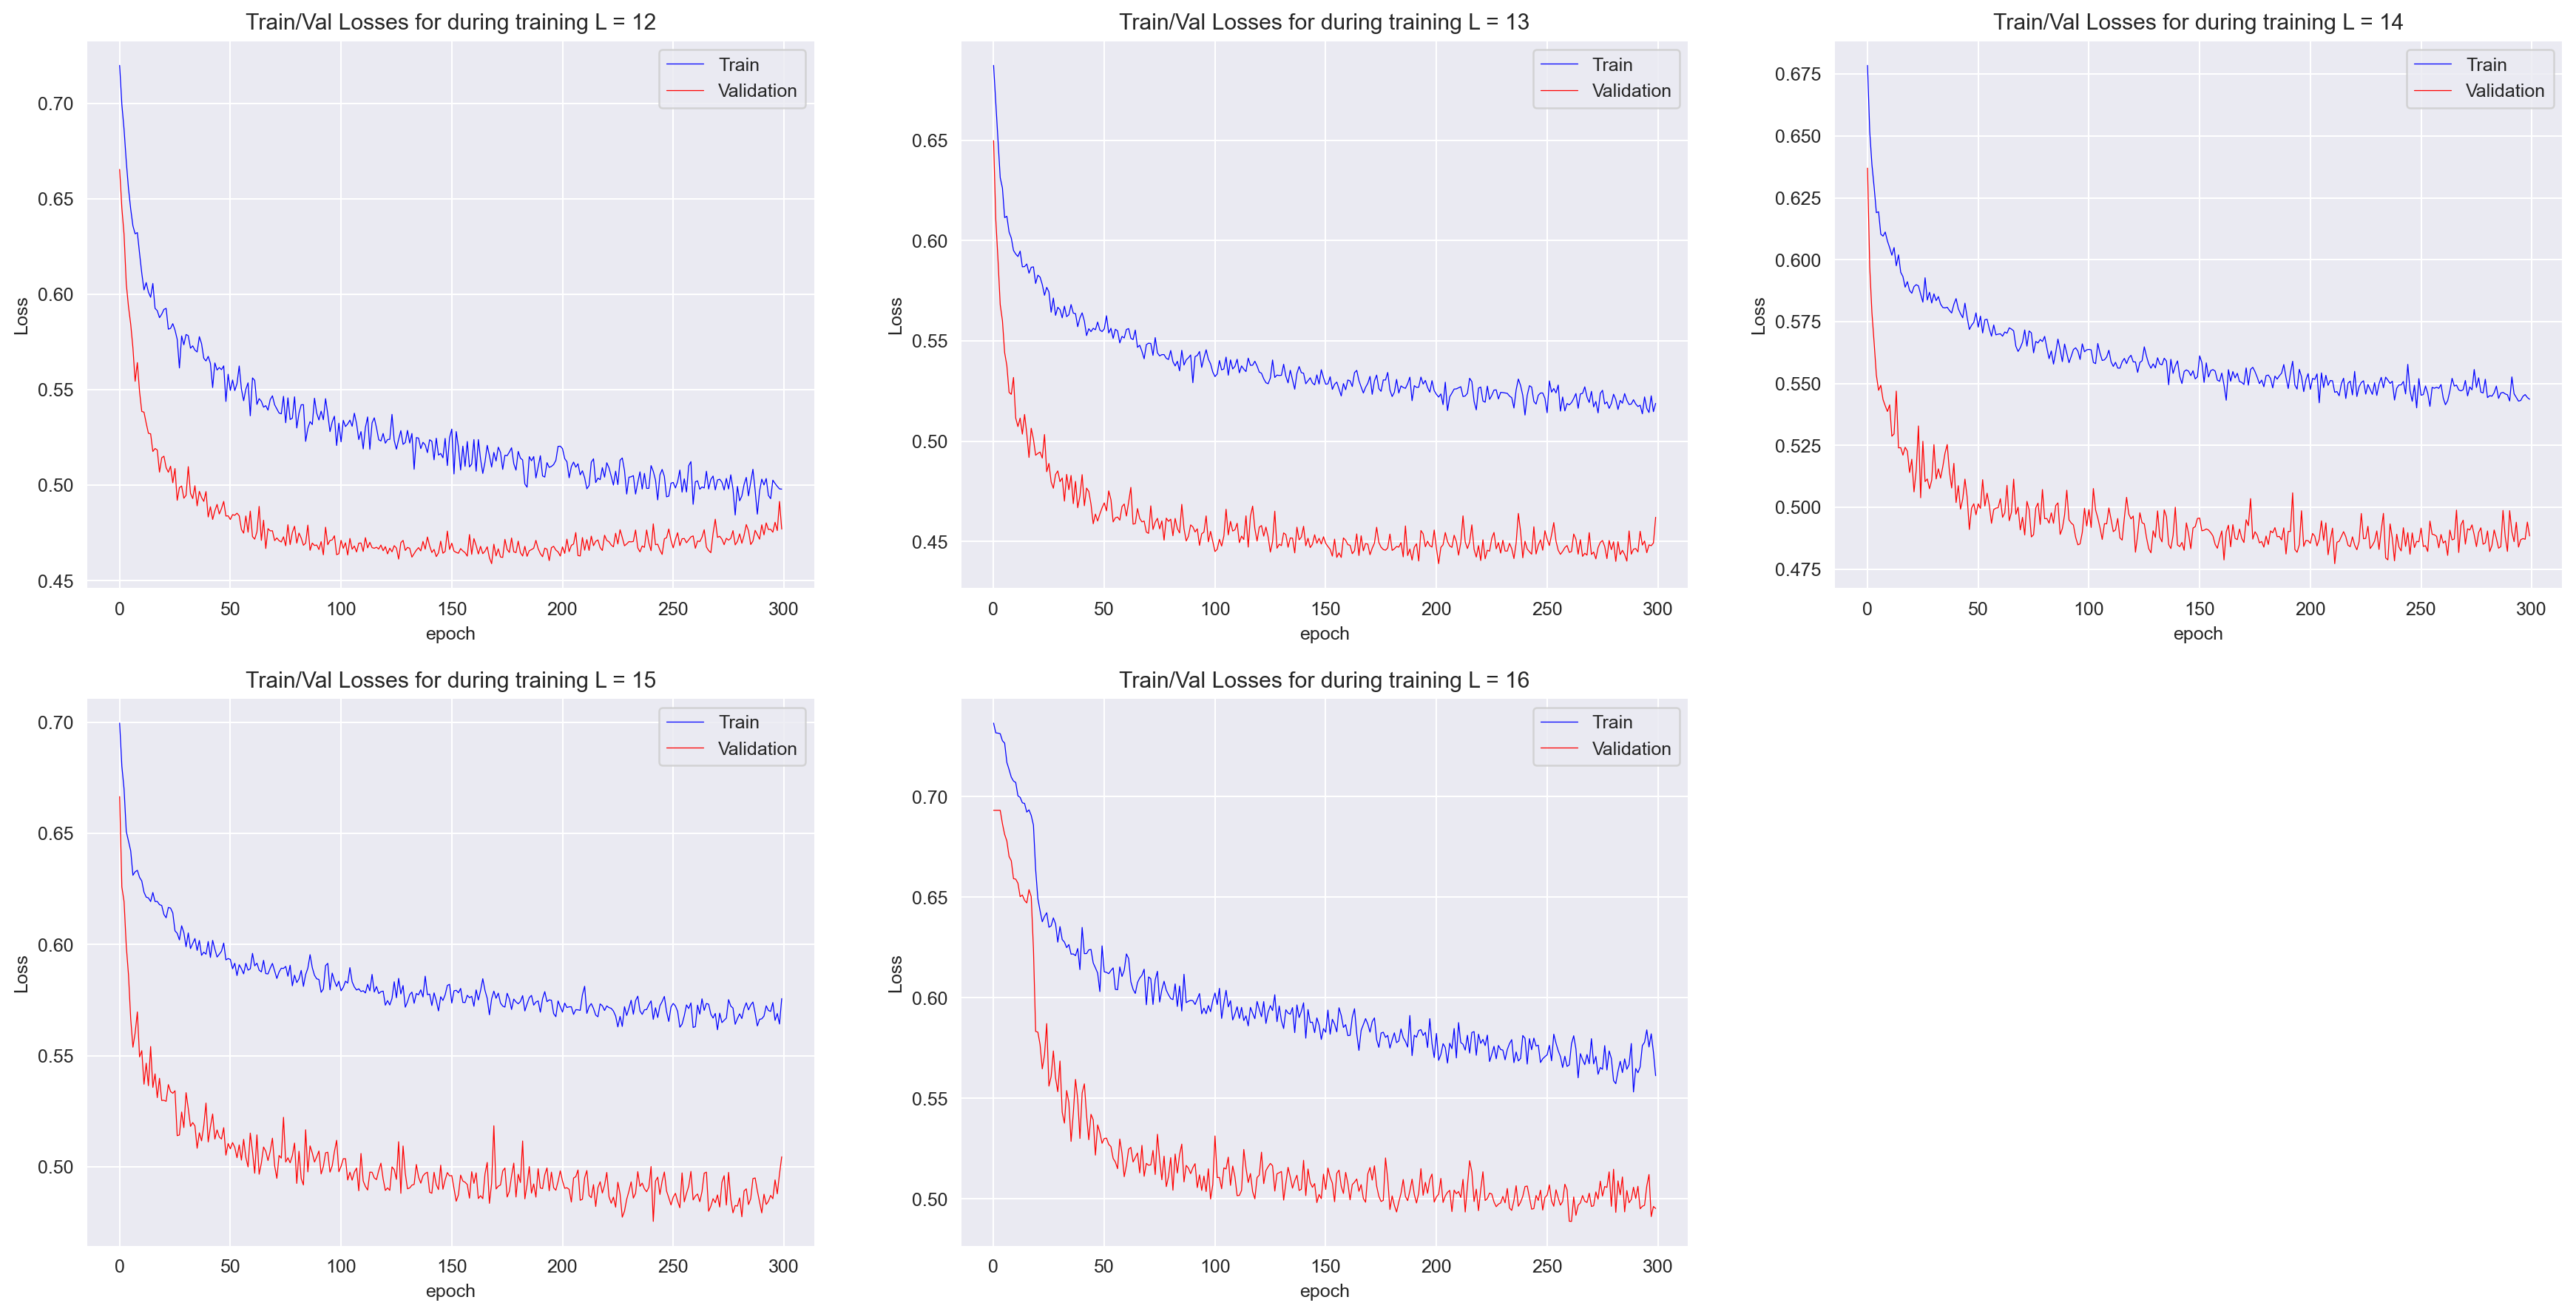

In [7]:
EPOCHLAYOUT = {
    1: [1, 1, (8,6)],
    2: [1, 2, (16,6)],
    3: [1, 3, (24,6)],
    4: [2, 2, (16,12)],
    5: [2, 3, (24,12)]
}                                
def plot_loss(train_dict, val_dict, keys, save = 'losses.jpg'):
    num = len(keys)
    fig, axes = plt.subplots(EPOCHLAYOUT[num][0],EPOCHLAYOUT[num][1], figsize = EPOCHLAYOUT[num][2])
    if num > 1: 
        ax = axes.ravel() 
        for index, ll in enumerate(keys):
            ax[index].plot(train_dict[ll], 'b-', lw = 0.5, label = 'Train')
            ax[index].plot(val_dict[ll], 'r-', lw = 0.5, label = 'Validation')
            ax[index].legend(loc='best')
            ax[index].set_title('Train/Val Losses for during training L = {}'.format(ll))
            ax[index].set_xlabel('epoch')
            ax[index].set_ylabel('Loss')
        if num == 5 : fig.delaxes(ax[-1])
    if num == 1:
        ll=keys[0]
        print(ll)
        print(train_dict.keys())
        axes.plot(train_dict[ll], 'b-', lw = 0.5, label = 'Train')
        axes.plot(val_dict[ll], 'r-', lw = 0.5, label = 'Validation')
        axes.legend(loc='best')
        axes.set_title('Train/Val Losses for during training L = {}'.format(ll),fontweight='bold')
        axes.set_xlabel('epoch')
        axes.set_ylabel('Loss')
    plt.savefig(save)
    
plot_loss(a,b,[12,13,14,15,16])

In [22]:
#Checking ROC Curves
TRAINDIR = '../TrainingData/'
files = os.listdir(TRAINDIR)
files = [f for f in files if '.txt' in f]

test_normal = read_seq(TRAINDIR+files[1])
test_tumor = read_seq(TRAINDIR+files[3])
test_data, test_labels = generate_features_labels(test_tumor, test_normal)
keys = [12,13,14,15,16]
roc_dict = {}
criterion = nn.CrossEntropyLoss()
#Getting roc_dict on test set
for ll in keys:
    data_tmp= test_data[ll].detach().clone().to(device)
    labels_tmp= test_labels[ll].detach().clone().to(device)
    models[ll].to('cuda')
    _,_, auc, _, CURVE = eval_model(models[ll], criterion, 
                                    data_tmp, labels_tmp, return_curve = True)
    roc_dict[ll] = [auc, CURVE]
    data_tmp.to('cpu')
    labels_tmp.to('cpu')
    models[ll].to('cpu')


Getting data
Data device = cpu
Done loading, returning features and labels.


In [28]:
len(roc_dict[12][1][0])

734

In [38]:
roc_dict[12][1][0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.50247636e-04,
       4.50247636e-04, 9.00495272e-04, 9.00495272e-04, 1.35074291e-03,
       1.35074291e-03, 1.80099054e-03, 1.80099054e-03, 2.25123818e-03,
       2.25123818e-03, 3.15173345e-03, 3.15173345e-03, 3.60198109e-03,
       3.60198109e-03, 4.05222873e-03, 4.05222873e-03, 4.50247636e-03,
       4.50247636e-03, 4.95272400e-03, 4.95272400e-03, 5.40297163e-03,
       5.40297163e-03, 5.85321927e-03, 5.85321927e-03, 6.30346691e-03,
       6.30346691e-03, 6.75371454e-03, 6.75371454e-03, 7.20396218e-03,
       7.20396218e-03, 7.65420982e-03, 7.65420982e-03, 8.10445745e-03,
       8.10445745e-03, 8.55470509e-03, 8.55470509e-03, 9.00495272e-03,
       9.00495272e-03, 9.45520036e-03, 9.45520036e-03, 9.90544800e-03,
       9.90544800e-03, 1.03556956e-02, 1.03556956e-02, 1.12561909e-02,
       1.12561909e-02, 1.17064385e-02, 1.17064385e-02, 1.21566862e-02,
       1.21566862e-02, 1.26069338e-02, 1.26069338e-02, 1.30571814e-02,
      

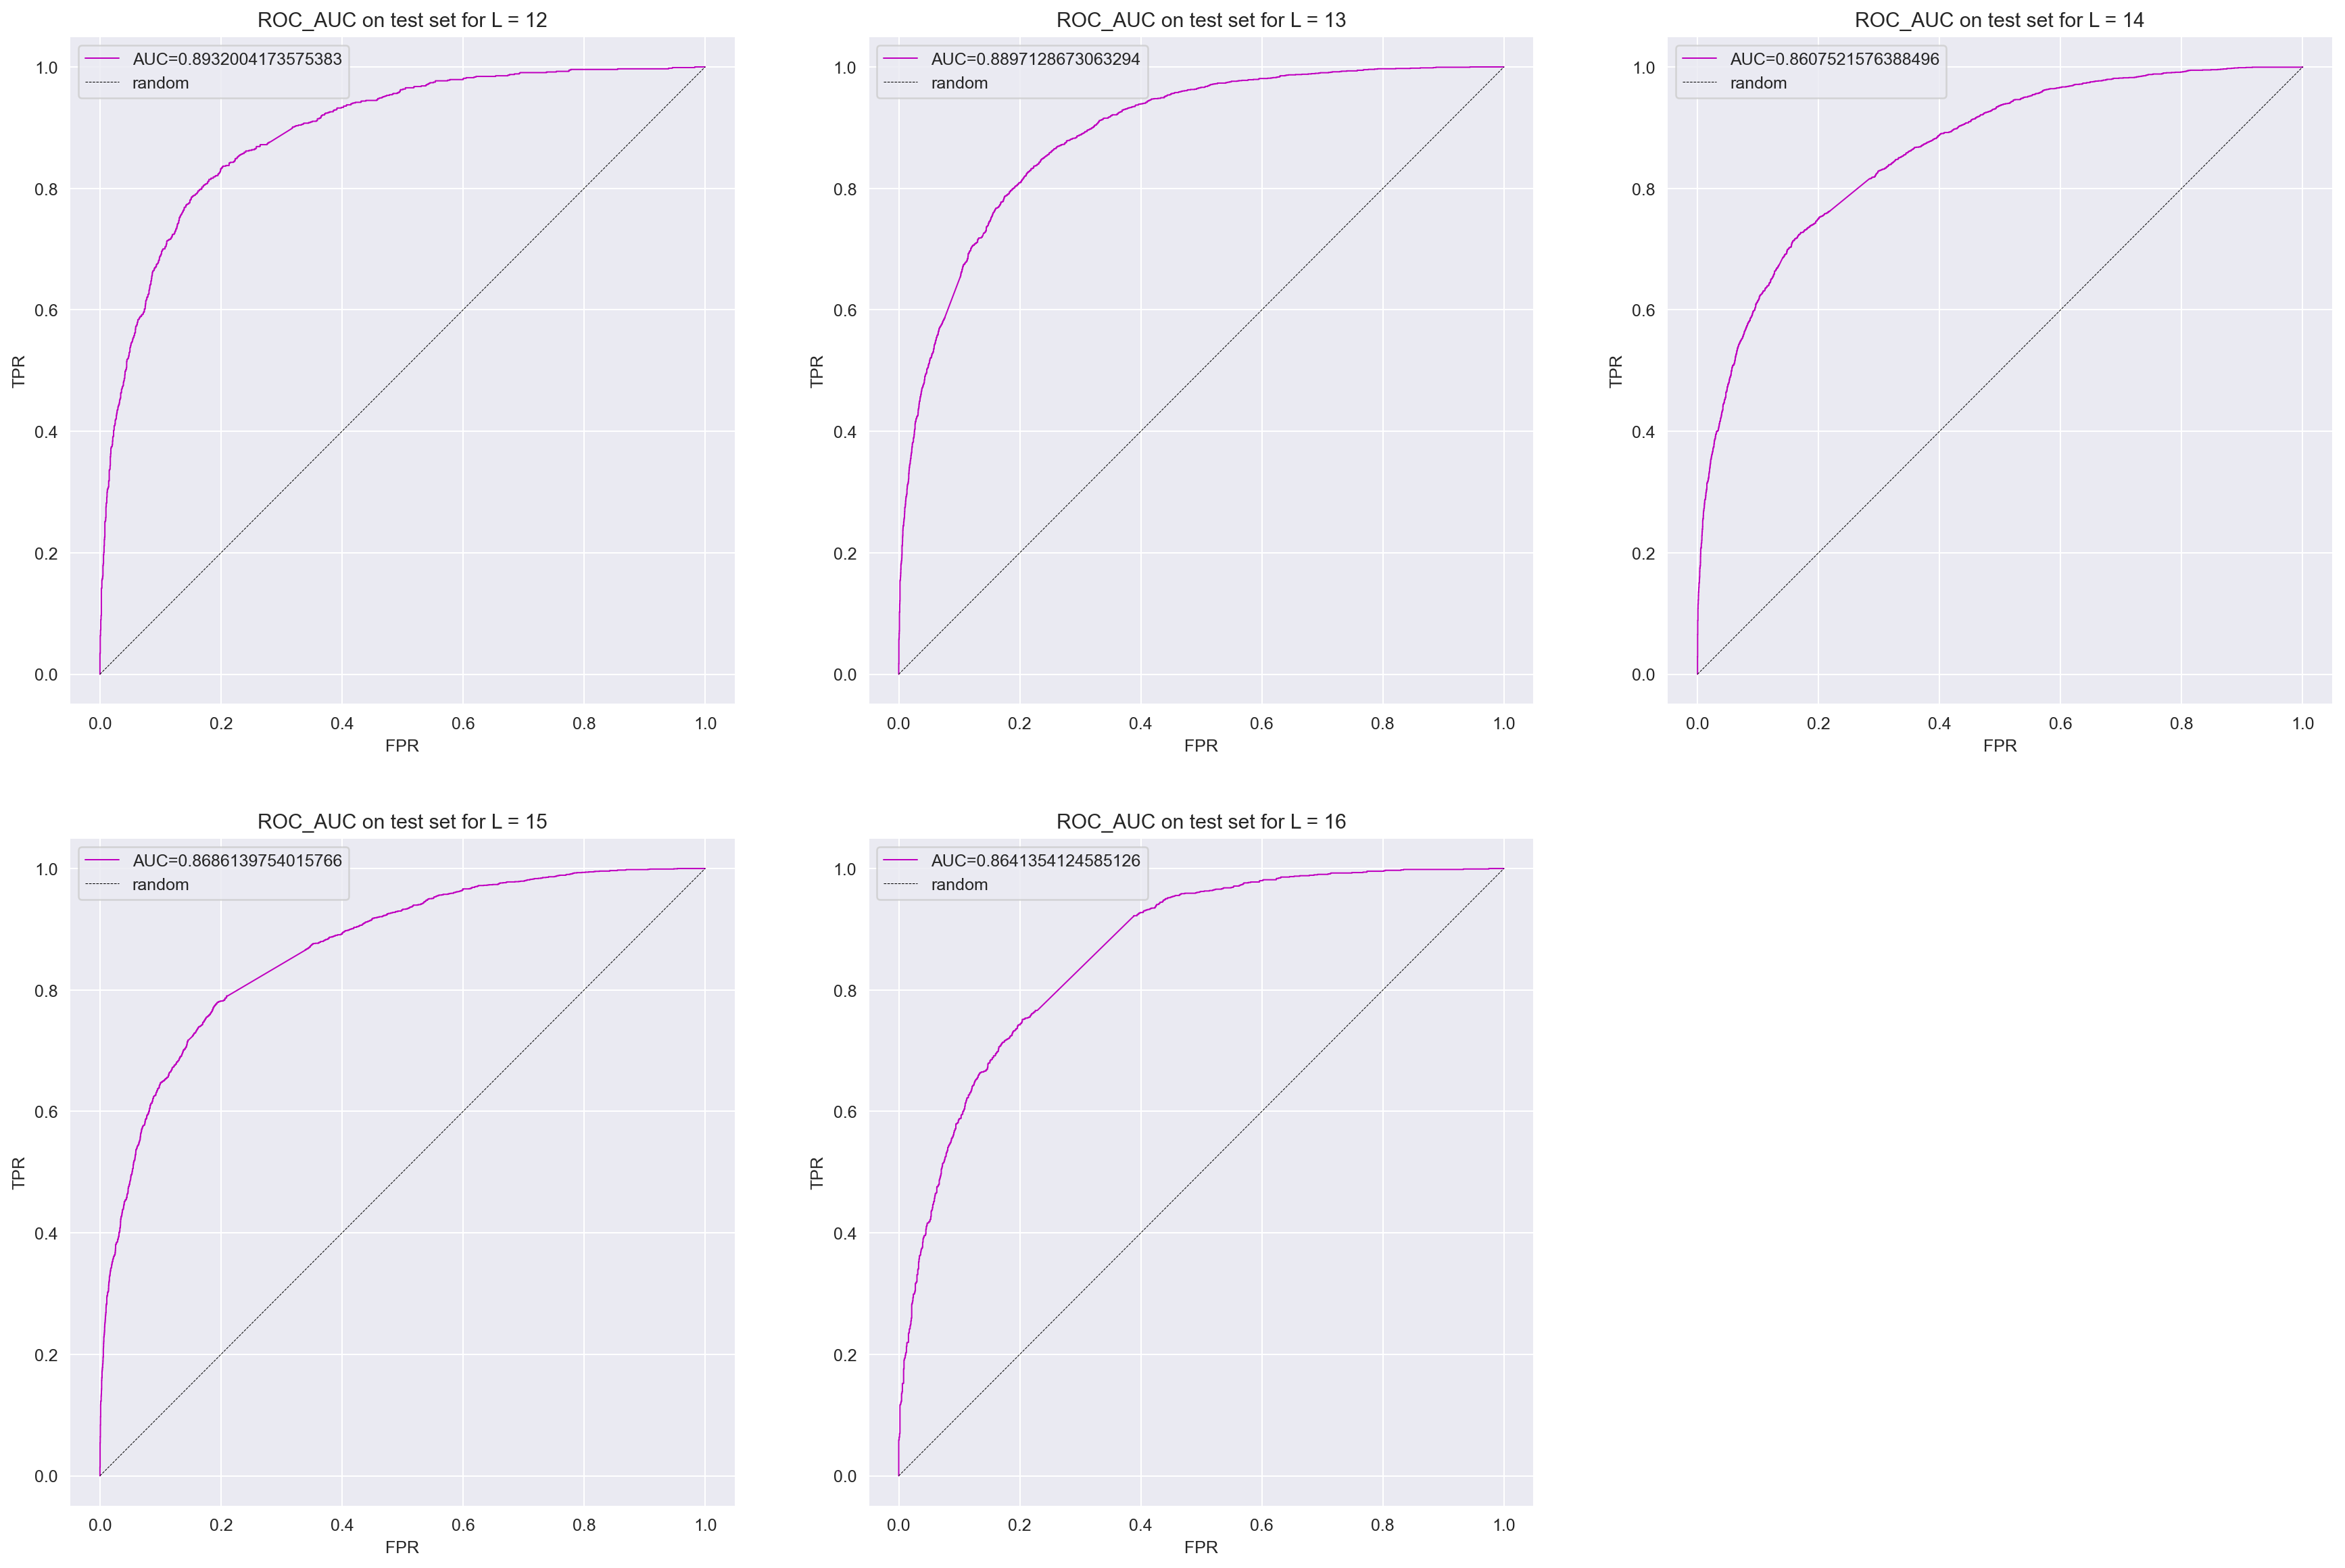

In [63]:
SQRLAYOUT = {
    1: [1, 1, (8,8)],
    2: [1, 2, (16,8)],
    3: [1, 3, (24,8)],
    4: [2, 2, (16,16)],
    5: [2, 3, (24,16)]
}    
def plot_roc_curve(curve_dict, keys, save = 'roc_curves.jpg'):
    num = len(keys)
    fig, axes = plt.subplots(SQRLAYOUT[num][0],SQRLAYOUT[num][1], figsize = SQRLAYOUT[num][2])
    if num > 1: 
        ax = axes.ravel() 
        for index, ll in enumerate(keys):
            pts = np.linspace(0,1, (math.floor(len(curve_dict[ll][1][0])/100)))
            ax[index].plot(curve_dict[ll][1][0], curve_dict[ll][1][1],
                           'm-', lw = 0.8, label = 'AUC={}'.format(curve_dict[ll][0]))
            ax[index].plot(pts, pts, 'k--', lw = '0.4', label = 'random')
            ax[index].legend(loc='best')
            ax[index].set_title('ROC_AUC on test set for L = {}'.format(ll))
            ax[index].set_xlabel('FPR')
            ax[index].set_ylabel('TPR')
        if num == 5 : fig.delaxes(ax[-1])
            
    if num == 1:
        ll=keys[0]
        pts = np.linspace(0,1, (math.floor(len(curve_dict[ll][1][0])/100)))
        axes.plot(curve_dict[ll][1][0], curve_dict[ll][1][1],
                'm-', lw = 0.8, label = 'AUC={}'.format(curve_dict[ll][0]))
        axes.plot(pts, pts, 'k--', lw = '0.4', label = 'random')
        axes.legend(loc='best')
        axes.set_title('ROC_AUC on test set for L = {}'.format(ll))
        axes.set_xlabel('FPR')
        axes.set_ylabel('TPR')
        
    plt.savefig(save)
plot_roc_curve(roc_dict, [12,13,14,15,16])

In [5]:
from src.train_eval_helpers import get_pred_df
from src.models import load_models
keys = [12,13,14,15,16]
models = load_models(keys, '../output/test/')
TRAINDIR = '../TrainingData/'
test_normal = read_seq(TRAINDIR+files[1])
test_tumor = read_seq(TRAINDIR+files[3])
test_features, test_label = generate_features_labels(test_tumor, test_normal, keys, None, True)
df = get_pred_df(models, test_features, test_label)
display(df.sample(5)), df.dtypes

Models loaded
Getting data
Data device = cpu
Done loading, returning features and labels.


,seqlen,y_true,predicted,prob_cancer,tp,fp,tn,fn
1787,12,0,0,0.500000,0,0,1,0
10754,14,0,0,0.500000,0,0,1,0
24902,15,1,0,0.500000,0,0,0,1
16256,14,0,0,0.500000,0,0,1,0
7667,13,0,0,0.133089,0,0,1,0


(None,
 seqlen           int64
 y_true           int64
 predicted        int64
 prob_cancer    float32
 tp               int64
 fp               int64
 tn               int64
 fn               int64
 dtype: object)

In [22]:
from src.plots import plot_PPV, plot_accs

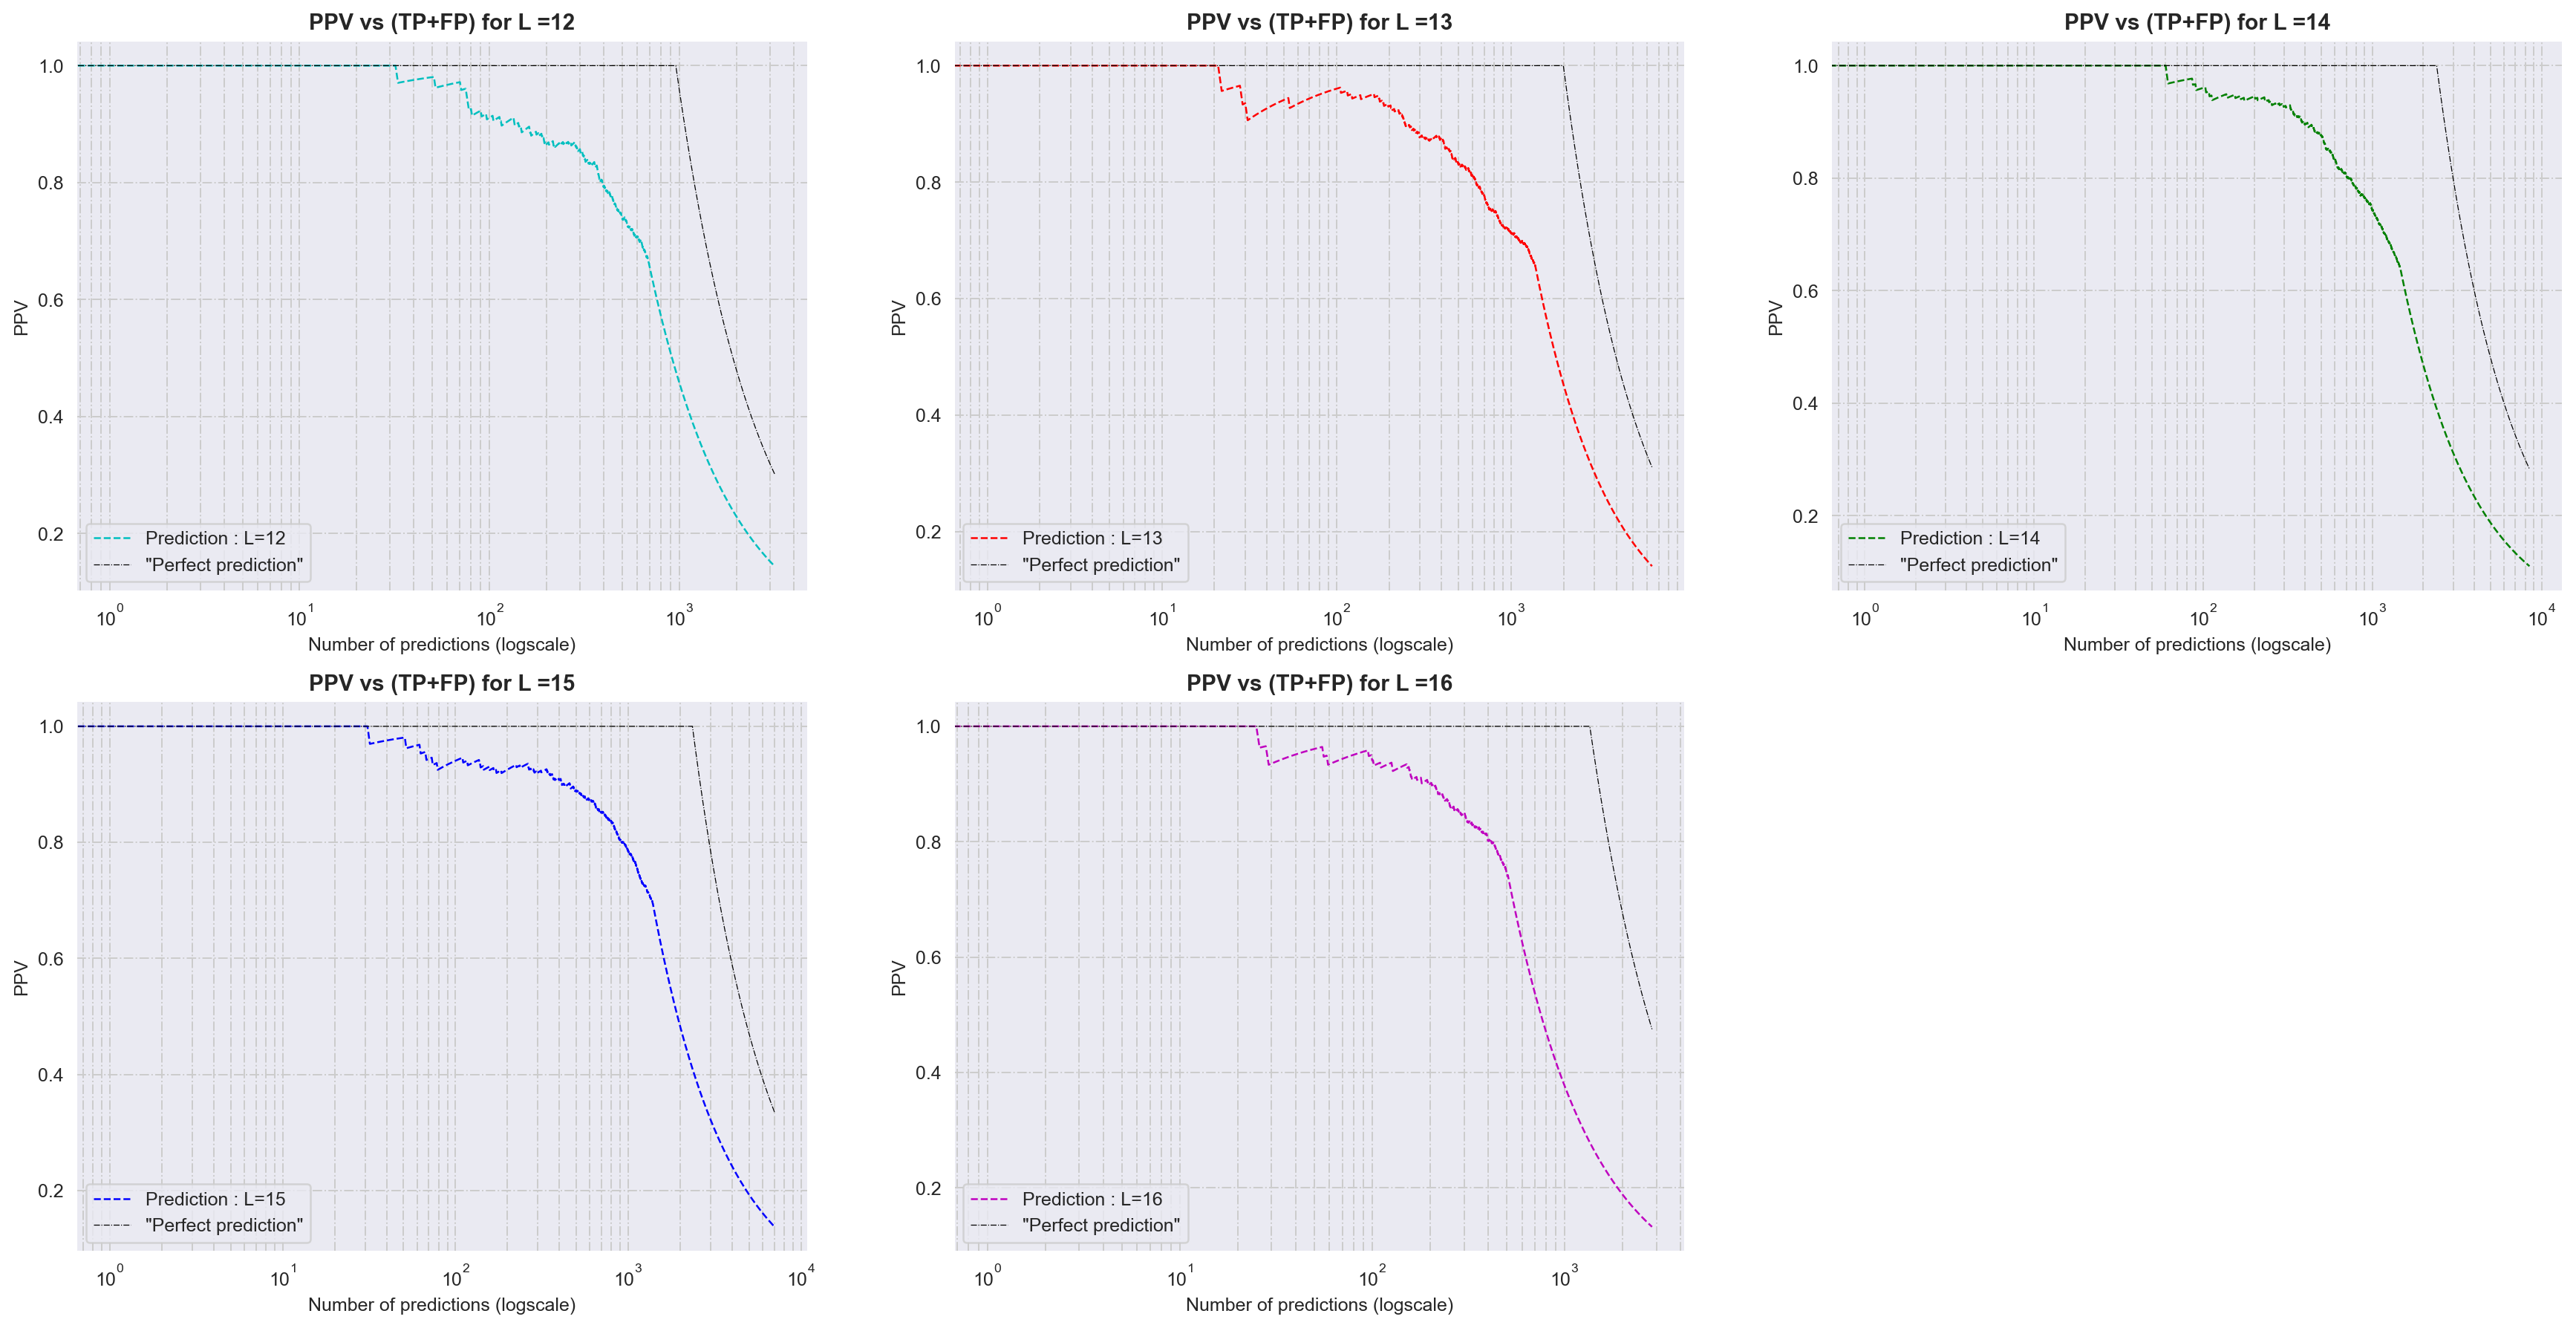

In [25]:
plot_PPV(df)

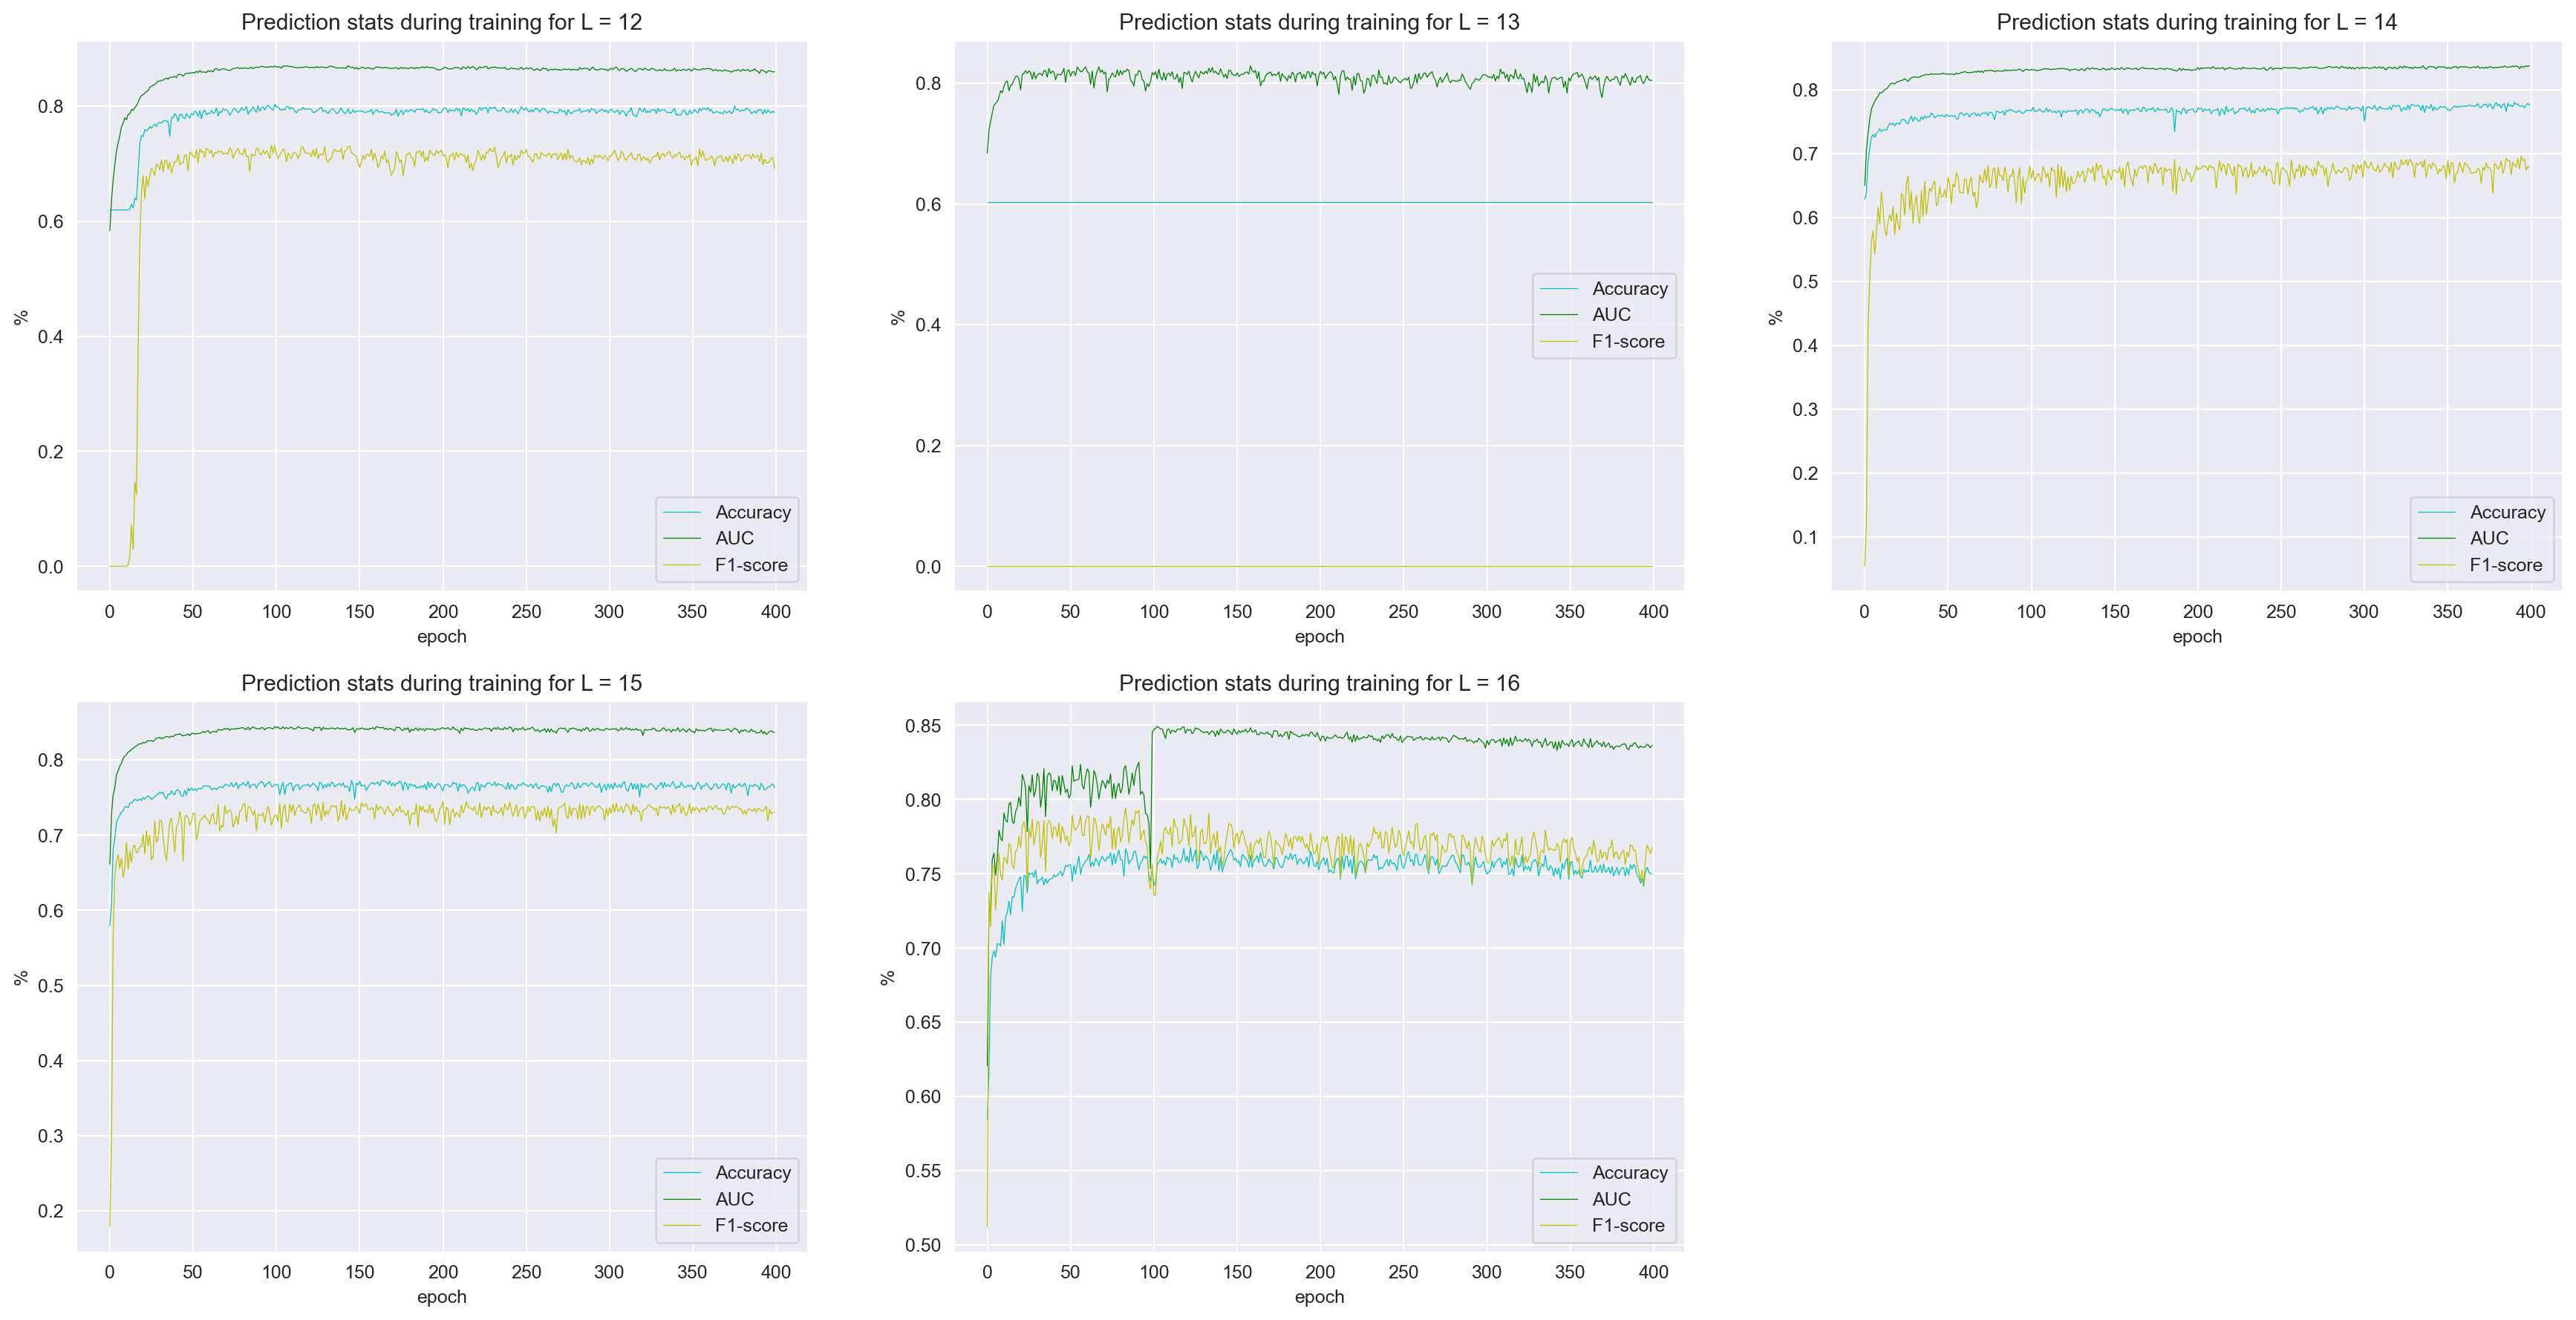

In [80]:
plot_accs(accs, aucs, f1s, keys, folder = 'C:\\Users\\richi\\Documents\\EPFL\\Master\\PDM\\code\\DeepTCR_PyTorch\\output/testplots/')

In [46]:
def test_eval(model_dict, keys, criterion, data_dict, labels_dict, return_curve=False):
    """
    takes a model_dict and evaluates each model on the corresponding data
    """
    eval_loss_dict = {}
    acc_dict = {}
    AUC_dict = {}
    f1_dict = {}
    curve_dict = {}
    for index, ll in enumerate(keys):
        if return_curve :
            loss, acc, auc, f1, curve = eval_model(model_dict[ll], criterion, 
                                                   data_dict[ll], labels_dict[ll],
                                                  return_curve = True)
            curve_dict[ll] = (auc, curve)
        elif return_curve == False:
            loss, acc, auc, f1 = eval_model(model_dict[ll], criterion, 
                                            data_dict[ll], labels_dict[ll],
                                            return_curve = False)
        eval_loss_dict[ll] = loss
        acc_dict[ll] = acc
        AUC_dict[ll] = auc
        f1_dict[ll] = f1
    if return_curve :
        return eval_loss_dict, acc_dict, AUC_dict, f1_dict, curve_dict
    else:
        return eval_loss_dict, acc_dict, AUC_dict, f1_dict
            

In [78]:
models = load_models([12,13,14,15,16], '../output/training_output/')
test_normal = read_seq(TRAINDIR+files[1])
test_tumor = read_seq(TRAINDIR+files[3])
test_data, test_labels = generate_features_labels(test_tumor, test_normal)
keys = [12,13,14,15,16]
a,b,c,d,e = test_eval(models, [12,13,14,15,16], nn.CrossEntropyLoss(), test_data, test_labels, return_curve=True)


Models loaded
Getting data
Data device = cpu
Done loading, returning features and labels.


In [ ]:
eval_df = pd.DataFrame(index=[12, 13, 14, 15, 16],columns = ['accuracy','AUC','f1_score','curve']) 
for key in keys:
    eval_df.loc[key][['accuracy','AUC','f1_score','curve']] = b[key], c[key], d[key], e[key]
    
curves = pd.DataFrame(index=keys, columns = ['fpr','tpr','thr'])
for key in keys:
    curves.loc[key][['fpr','tpr','thr']] = e[key][0], e[key][1], e[key][2]

eval_df[['accuracy','AUC','f1_score']].to_csv('eval.csv')

In [100]:
import pickle
with open('../output/testplots/curve_df.pkl', 'rb') as f:
    x = pickle.load(f)
x[13][2].shape

(1084,)

In [108]:
def plot_roc_curve(curve_dict, keys, save = 'roc_curves.jpg', folder=None):
    num = len(keys)
    fig, axes = plt.subplots(SQRLAYOUT[num][0],SQRLAYOUT[num][1], figsize = SQRLAYOUT[num][2])
    if num > 1: 
        ax = axes.ravel() 
        for index, ll in enumerate(keys):
            pts = np.linspace(0,1, 100)
            ax[index].plot(curve_dict[ll][0], curve_dict[ll][1],
                           'm-', lw = 0.8, label = 'AUC={}'.format(curve_dict[ll][0]))
            ax[index].plot(pts, pts, 'k--', lw = '0.4', label = 'random')
            ax[index].legend(loc='best')
            ax[index].set_title('ROC_AUC on test set for L = {}'.format(ll))
            ax[index].set_xlabel('FPR')
            ax[index].set_ylabel('TPR')
        if num == 5 : fig.delaxes(ax[-1])
            
    if num == 1:
        ll=keys[0]
        pts = np.linspace(0,1, 100)
        axes.plot(curve_dict[ll][0], curve_dict[ll][1],
                'm-', lw = 0.8, label = 'AUC={}'.format(curve_dict[ll][0]))
        axes.plot(pts, pts, 'k--', lw = '0.4', label = 'random')
        axes.legend(loc='best')
        axes.set_title('ROC_AUC on test set for L = {}'.format(ll))
        axes.set_xlabel('FPR')
        axes.set_ylabel('TPR')
    if save == None:
        return
    if folder is not None:
        plt.savefig(os.path.join(folder,save))
    else:
        plt.savefig(OUTPATH+save)
        

In [ ]:
plot_roc_curve(x, [12,13,14], save = None, folder=None)

In [4]:
from src.models import *
model_info([12,13,14,15,16], PATH='../output/1000epochs_bs500')

L = 12
	epoch : 813
	model : deepcat_cnn_12
	best_metric : val
	args : Namespace(batchsize=500, indir='./TrainingData/', keys=[12, 13, 14, 15, 16], kfold=5, lr=0.0005, metric='val', nb_epochs=1000, outdir='1000epochs_bs500/', plots=True, ratio=0.3333333333333333, test=True, v=True, valmode='naive')
	val_loss : 0.4427374601364136
	acc : 0.7930052867019114
	AUC : 0.8652999612314647
	F1 : 0.7404385517593064
L = 13
	epoch : 680
	model : deepcat_cnn_13
	best_metric : val
	args : Namespace(batchsize=500, indir='./TrainingData/', keys=[12, 13, 14, 15, 16], kfold=5, lr=0.0005, metric='val', nb_epochs=1000, outdir='1000epochs_bs500/', plots=True, ratio=0.3333333333333333, test=True, v=True, valmode='naive')
	val_loss : 0.44030383229255676
	acc : 0.793338683788122
	AUC : 0.8673262965547376
	F1 : 0.7132516703786191
L = 14
	epoch : 507
	model : deepcat_cnn_14
	best_metric : val
	args : Namespace(batchsize=500, indir='./TrainingData/', keys=[12, 13, 14, 15, 16], kfold=5, lr=0.0005, metric='val', nb